In [95]:
import pandas as pd
import numpy as np

In [96]:
data=pd.read_csv('/content/IMDB Dataset.csv', encoding='utf-8')

In [97]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [98]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [99]:
data['sentiment'] = data['sentiment'].map({'positive': 0, 'negative': 1})
data['sentiment'].loc[:5]

,sentiment
0,0
1,0
2,0
3,1
4,0
5,0


In [100]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0


In [101]:
def lower_case(input_text):
  input_text=input_text.lower()
  return input_text


In [102]:
import nltk
from nltk.corpus import stopwords

In [103]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [105]:
#remove stopwords
def rem_sw(input_text):
  clean_words = []
  stopword_list=stopwords.words('english')
  words=input_text.split()
  for word in words:
    if word not in stopword_list:
      clean_words.append(word)
  clean_words = ' '.join(clean_words)
  return clean_words

data['review'] = data['review'].apply(rem_sw)
data.head()

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought wonderful way spend time hot summer ...,0
3,Basically there's family little boy (Jake) thi...,1
4,"Petter Mattei's ""Love Time Money"" visually stu...",0


In [106]:
def rem_special_character(input_text):
    clean_words = ""
    for spc in input_text:
        if spc.isalnum():
            clean_words += spc
    return clean_words

data['review'] = data['review'].apply(rem_special_character)
data.head()

,review,sentiment
0,Onereviewersmentionedwatching1OzepisodehookedT...,0
1,AwonderfullittleproductionbrbrThefilmingtechni...,0
2,Ithoughtwonderfulwayspendtimehotsummerweekends...,0
3,BasicallytheresfamilylittleboyJakethinkstheres...,1
4,PetterMatteisLoveTimeMoneyvisuallystunningfilm...,0


In [107]:
#remove html tag
import re
def rem_html_tag(input_text):
  clean_words=re.sub('<.*?>','',input_text)
  return clean_words
data['review'] = data['review'].apply(rem_html_tag)
data.head()

,review,sentiment
0,Onereviewersmentionedwatching1OzepisodehookedT...,0
1,AwonderfullittleproductionbrbrThefilmingtechni...,0
2,Ithoughtwonderfulwayspendtimehotsummerweekends...,0
3,BasicallytheresfamilylittleboyJakethinkstheres...,1
4,PetterMatteisLoveTimeMoneyvisuallystunningfilm...,0


In [124]:
from sklearn.feature_extraction.text import CountVectorizer

In [125]:
v=CountVectorizer()

In [126]:
x=v.fit_transform(data['review'])
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [111]:
y=data['sentiment']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [112]:
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

In [113]:
model=LogisticRegression()

In [114]:
model.fit(x_train,y_train)

LogisticRegression()

In [115]:
model.predict(v.transform(['movie is excellent']))

array([1])

In [117]:
model.score(x_test,y_test)

0.4948

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.4948

In [120]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.49322900993078544
Recall: 1.0


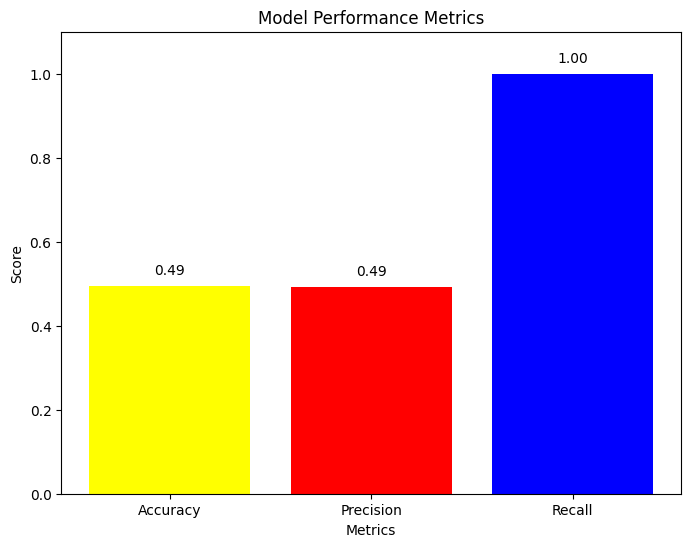

In [121]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['yellow', 'red', 'blue'])
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.1)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
plt.show()